In [2]:
pip install tensorflow

  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import math
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [7]:
nba_data = pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv") #download data
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [8]:
nba_data.isna().sum()
#nba_data = nba_data.dropna()  #for deleting the unknown value

first_name    0
last_name     0
team          0
salary        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg%           0
3p            0
3pa           0
3p%           0
2p            0
2pa           0
2p%           0
efg%          0
ft            0
fta           0
ft%           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
dtype: int64

In [13]:
nba_data_numeric = nba_data.copy()
del nba_data_numeric['first_name'] #delete unneeded data
del nba_data_numeric['last_name']
del nba_data_numeric['team']
del nba_data_numeric['pos']
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [10]:
def clean_currency(x): #get rid of symbols
    if isinstance(x, str):
        return(x.replace('$','').replace(',',''))
    return(x)

In [14]:
nba_data_numeric['salary'] = nba_data_numeric['salary'].apply(clean_currency).astype('float') #convert currency into float and
#clean the data of symbols
#apply() takes a function and applies it to all values of pandas Series
#astype() used to cast a pandas object to specified dtype
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [15]:
nba_data_numeric.describe() #get knowledge of the statistics of the data

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.00000,289.000000
mean,8.972877e+06,25.768166,56.619377,30.415225,1373.657439,237.546713,514.283737,0.458730,74.276817,208.335640,...,0.758394,55.598616,194.788927,250.387543,140.802768,44.529412,26.709343,75.211073,110.83045,647.304498
std,1.008679e+07,4.378557,18.081042,26.947104,698.833132,164.543135,347.674340,0.072096,63.139612,166.382283,...,0.109234,49.172226,138.198229,177.846596,126.966637,28.249385,24.822116,58.024125,58.04586,455.553247
min,5.318000e+03,19.000000,9.000000,0.000000,35.000000,3.000000,13.000000,0.231000,0.000000,1.000000,...,0.333000,2.000000,3.000000,7.000000,0.000000,0.000000,0.000000,2.000000,4.00000,12.000000
25%,2.033160e+06,22.000000,47.000000,5.000000,799.000000,110.000000,247.000000,0.411000,21.000000,70.000000,...,0.700000,22.000000,97.000000,125.000000,51.000000,25.000000,10.000000,38.000000,68.00000,299.000000
50%,4.259259e+06,25.000000,62.000000,21.000000,1406.000000,212.000000,465.000000,0.451000,57.000000,169.000000,...,0.770000,39.000000,174.000000,217.000000,99.000000,41.000000,19.000000,57.000000,106.00000,588.000000
75%,1.242000e+07,29.000000,70.000000,57.000000,1931.000000,324.000000,723.000000,0.496000,115.000000,320.000000,...,0.838000,73.000000,252.000000,334.000000,188.000000,62.000000,35.000000,100.000000,155.00000,892.000000
max,4.578097e+07,38.000000,82.000000,80.000000,2743.000000,774.000000,1564.000000,0.693000,285.000000,750.000000,...,1.000000,279.000000,813.000000,1019.000000,702.000000,138.000000,177.000000,292.000000,286.00000,2118.000000


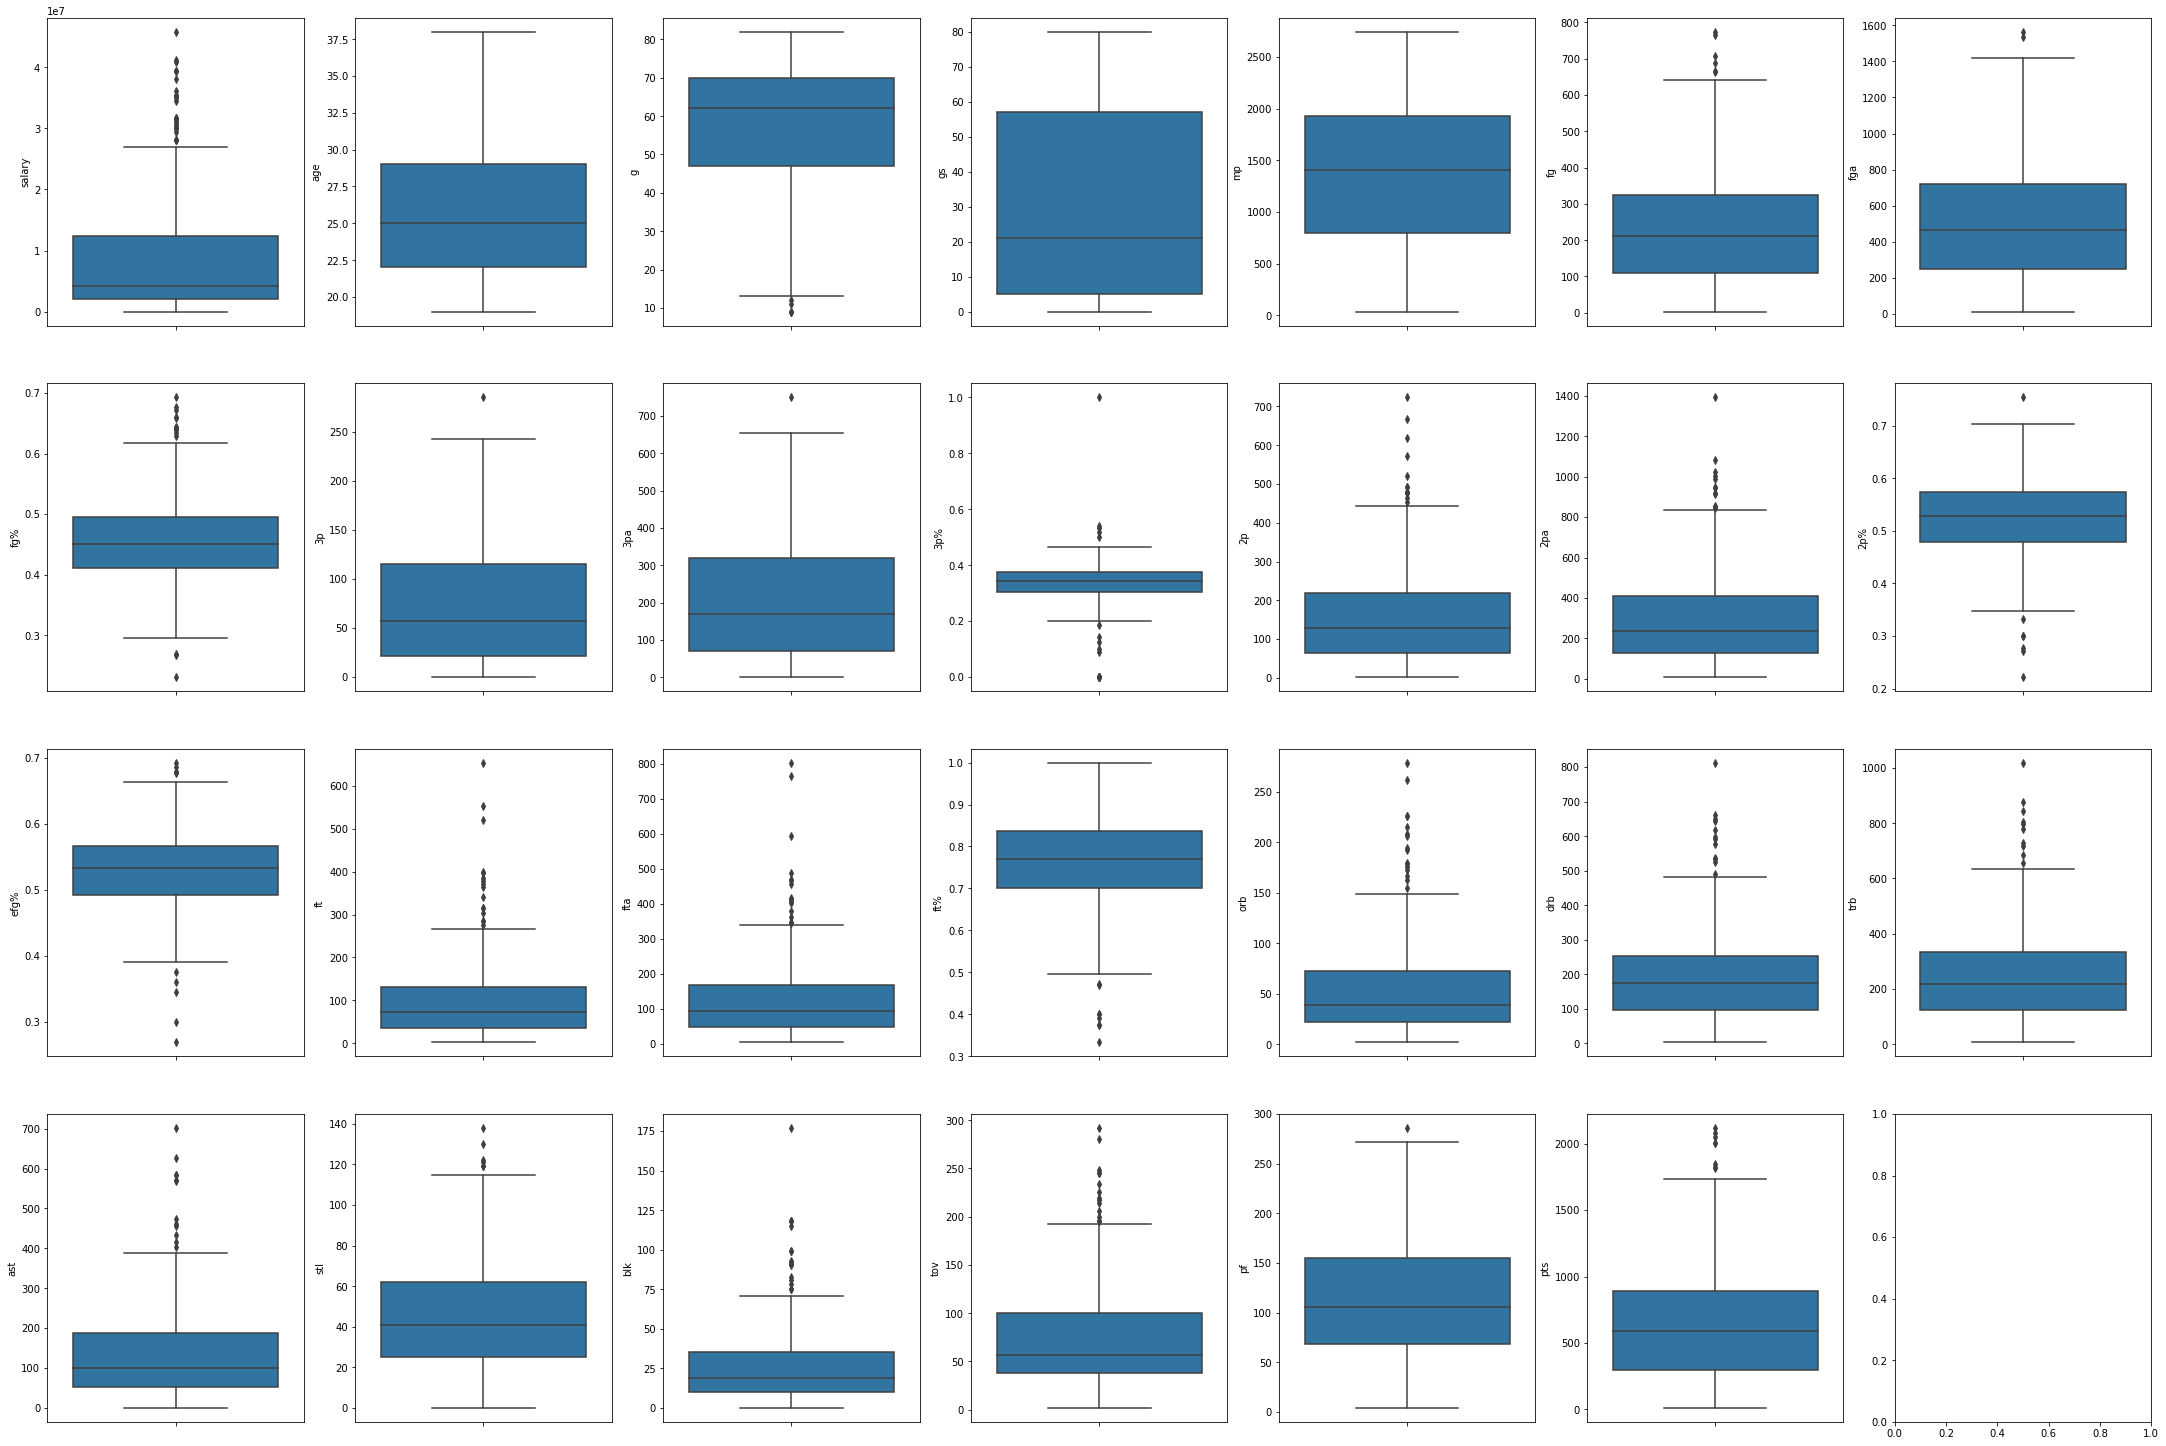

In [17]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30,20))
index = 0
axs = axs.flatten()
for k, v in nba_data_numeric.items(): #k = y-axis variable name (eg:"salary")
    sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index]) #plotting boxplot for getting knowledge of outliers
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

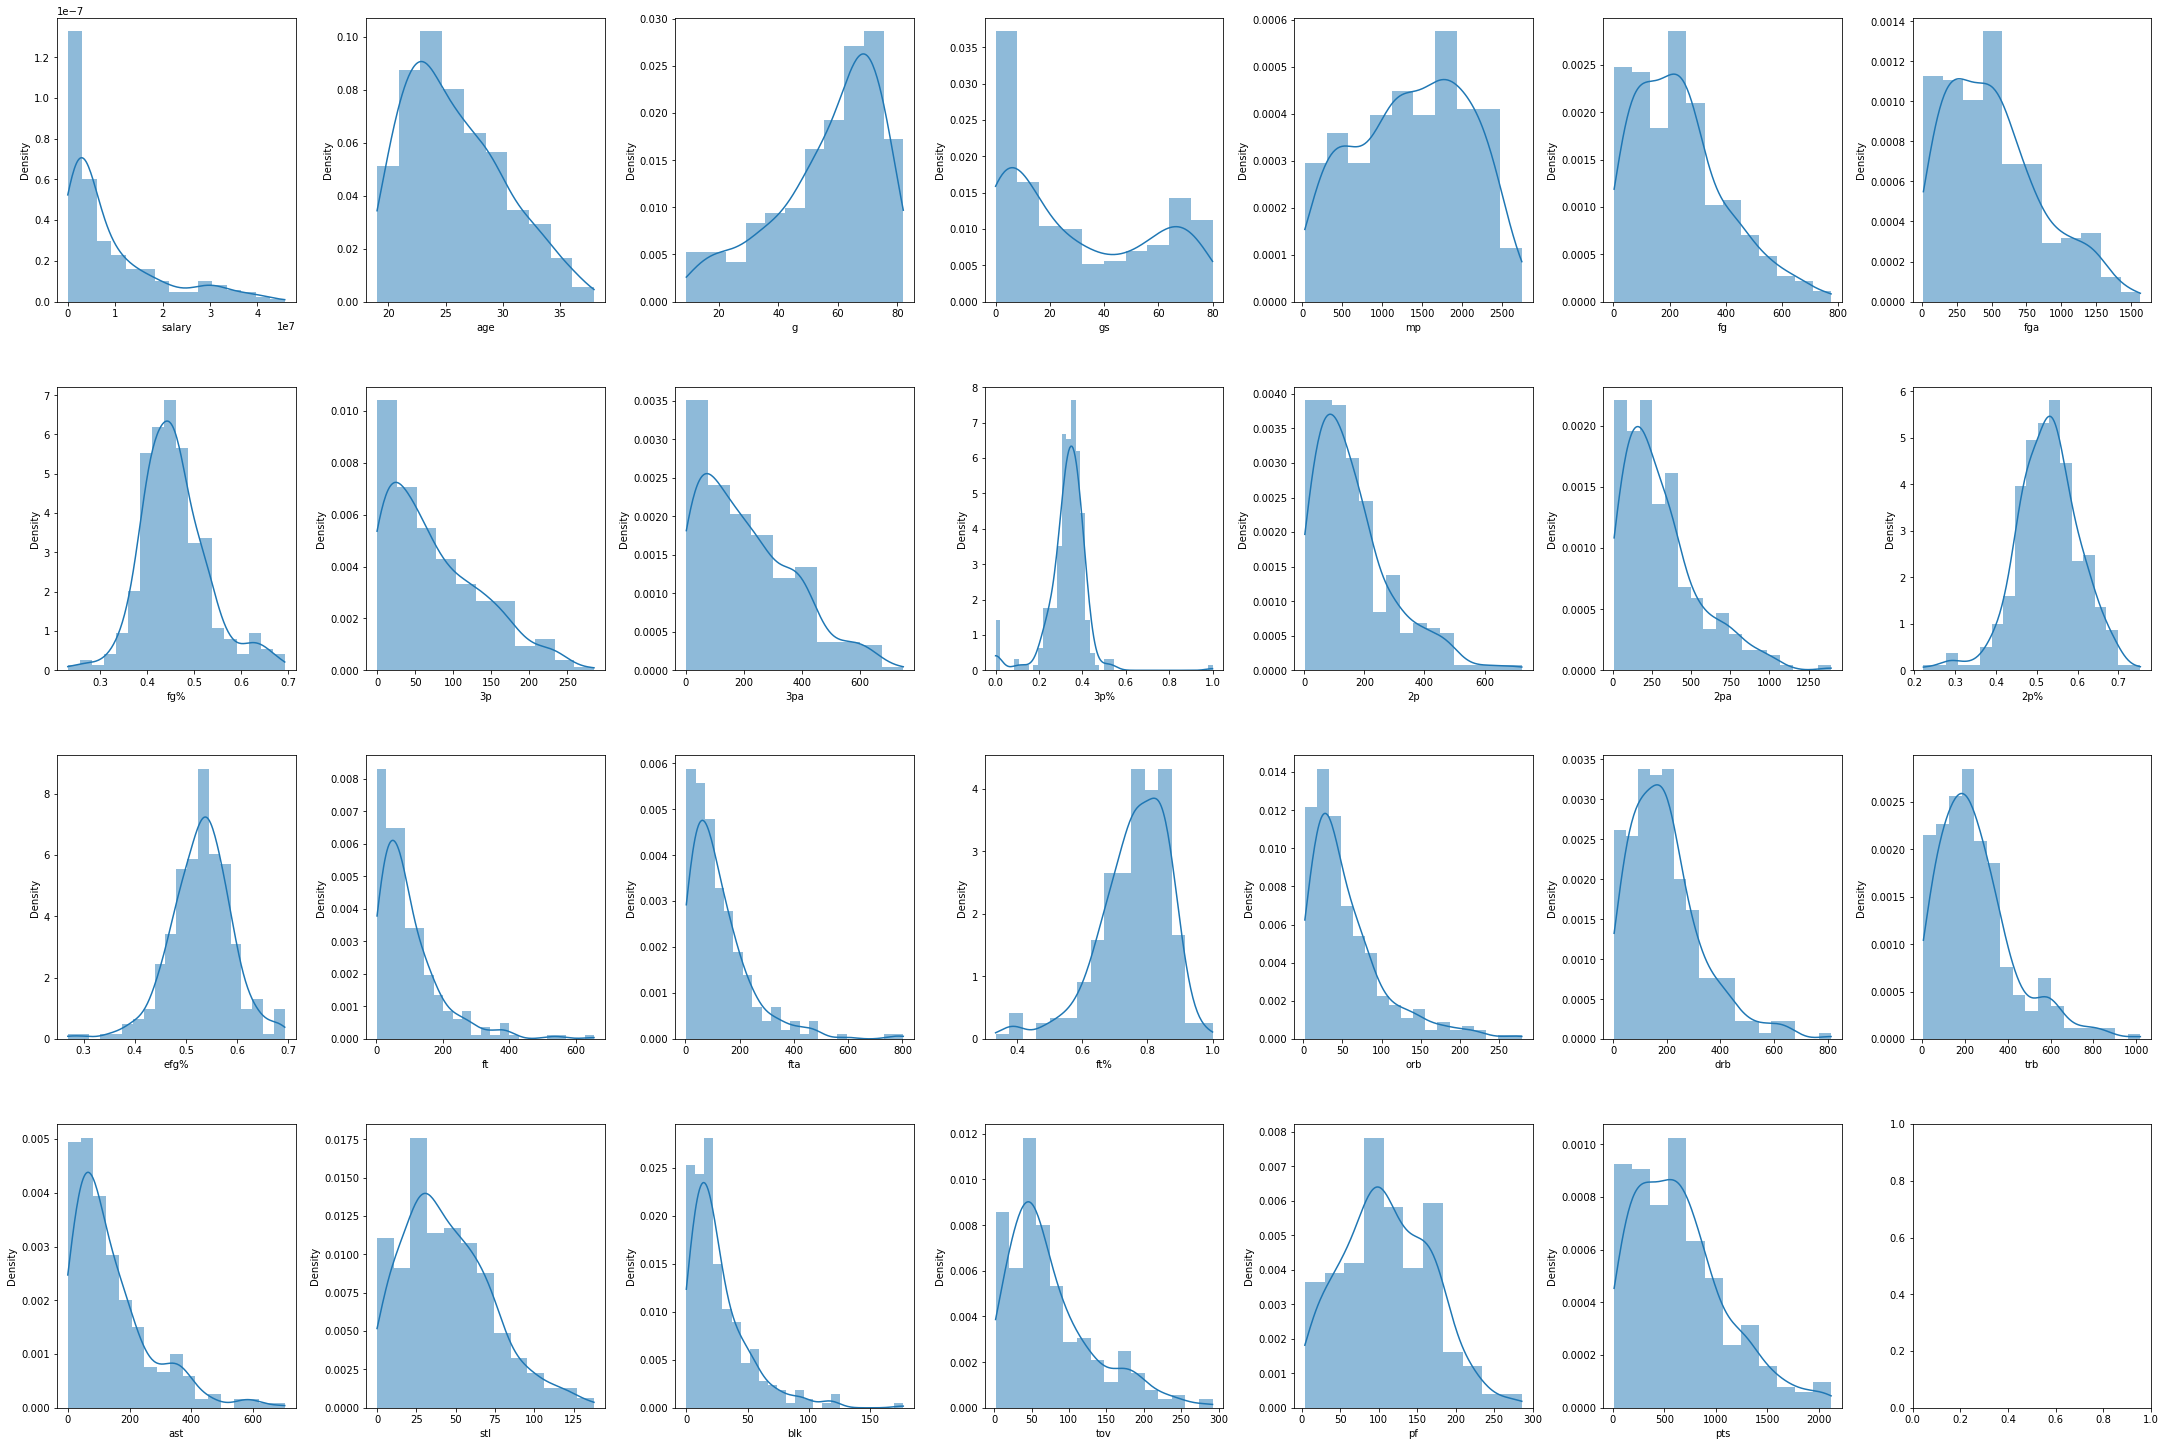

In [22]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30,20))
index = 0
axs = axs.flatten()
for k, v in nba_data_numeric.items(): #v = Pandas Series of data for a particular column
    sns.histplot(v, ax=axs[index], kde=True, linewidth=0, stat='density') #plotting histogram for getting frequency distribution
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

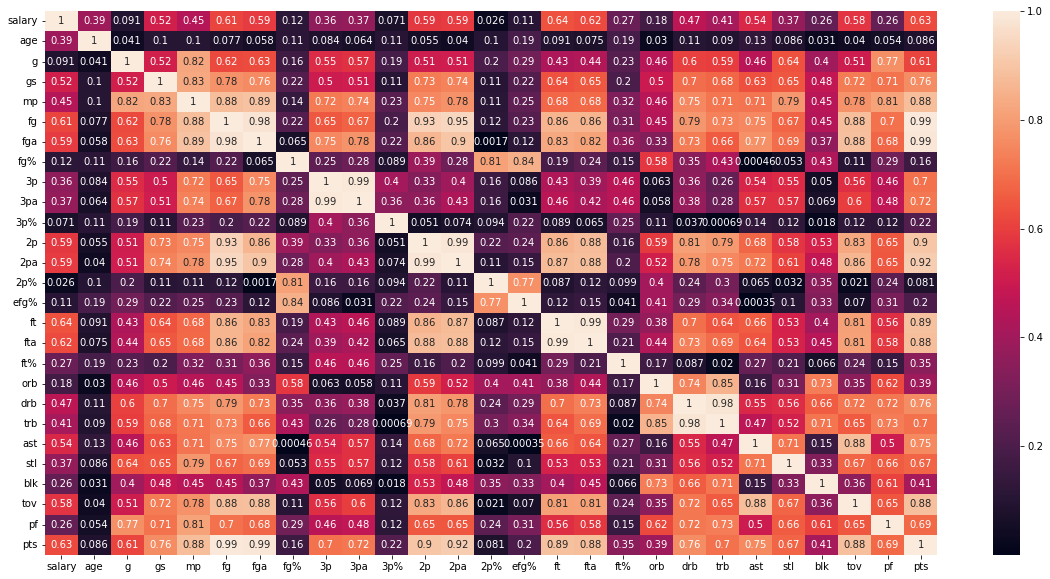

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(nba_data_numeric.corr().abs(), annot=True) #correlation matrix 

In [26]:
for k, v in nba_data_numeric.items(): #Outliers Percentage
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1 #Inter-Quartile Range (IQR) Method
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_data_numeric)[0]
    print(f"{k} Outliers = {round(perc, 2)}")

salary Outliers = 9.69
age Outliers = 0.0
g Outliers = 1.73
gs Outliers = 0.0
mp Outliers = 0.0
fg Outliers = 2.08
fga Outliers = 0.69
fg% Outliers = 4.84
3p Outliers = 0.35
3pa Outliers = 0.35
3p% Outliers = 6.57
2p Outliers = 4.5
2pa Outliers = 4.15
2p% Outliers = 2.42
efg% Outliers = 3.81
ft Outliers = 5.54
fta Outliers = 5.54
ft% Outliers = 2.77
orb Outliers = 5.54
drb Outliers = 4.15
trb Outliers = 3.46
ast Outliers = 4.15
stl Outliers = 2.08
blk Outliers = 5.54
tov Outliers = 4.84
pf Outliers = 0.35
pts Outliers = 2.77


In [27]:
scalar = tf.constant(5) #Creating Constant Tensor
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [29]:
vector = tf.constant([10, 10]) #Create a Vector
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [30]:
matrix = tf.constant([[1, 2], [3, 4]]) #Create a Matrix
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [31]:
tensor = tf.constant([[[1, 2, 3], [4, 5, 6]],      #Create a Tensor
                     [[7, 8, 9], [10, 11, 12]],
                     [[13, 14, 15], [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [32]:
v_tensor = tf.Variable([5, 6]) #Create a Tensor that can be changed
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 6])>

In [34]:
print("Index 0 :", v_tensor[0]) #Get Value
v_tensor[0].assign(8) #Change Value  
print("Index 0 :", v_tensor[0])

Index 0 : tf.Tensor(5, shape=(), dtype=int32)
Index 0 : tf.Tensor(8, shape=(), dtype=int32)


In [35]:
rand_tensor = tf.random.Generator.from_seed(66)  #Random Tensor
rand_tensor = rand_tensor.normal(shape=(3, 2), mean=0.0, stddev=1.0) #Bell Curve
rand_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.5517507 , -0.3741098 ],
       [-0.28709963,  1.5089895 ],
       [-0.14833727, -1.2846565 ]], dtype=float32)>

In [37]:
np_array = np.arange(1, 25, dtype=np.int32)
tensor2 = tf.constant(np_array) #NumPy Array into Tensor
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [38]:
tensor3 = tf.constant(np_array, shape=(6, 2, 2))  #Change Shape of Tensor
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]])>

In [42]:
#Get Info on Tensor
print("Index 0 :", tensor3[0])
print("Values in Dims :", tensor3.shape)
print("Dimensions :", tensor3.ndim)
print("Total Values :", tf.size(tensor3).numpy())
print("Data Type :", tensor3.dtype)

Index 0 : tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Values in Dims : (6, 2, 2)
Dimensions : 3
Total Values : 24
Data Type : <dtype: 'int32'>


In [46]:
#Matrix Multiplication
ic_sales = tf.constant([[26, 27, 22, 10, 12, 33],  #Matrix 1 dim(4,6)
                        [18, 21, 10, 8, 4, 26],
                        [9, 20, 4, 9, 7, 16],
                        [24, 19, 12, 8, 6, 14]])
ic_price = tf.constant([[3,2,4,4]]) #Matrix 2 dim(1,4)
tf.matmul(ic_price, ic_sales) #Matrix Multiplication resulting in matrix dim(1, 6)

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[246, 279, 150, 114,  96, 271]])>

In [88]:
'''
#Basics
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "pts"]), # Normalize these columns
    #(OneHotEncoder(handle_unknown="ignore"), ["pos", "team"]) # One hot encode these columns (pos, team)
)
'''
#Everything
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "g", "gs", "mp", "fg", "fga", "fg%", "3p", "3pa", "3p%", "2p", "2pa", "2p%", "efg%", "ft", "fta", "ft%", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]), # Normalize these columns
    #(OneHotEncoder(handle_unknown="ignore"), ["team", "pos"]) # One hot encode these columns (pos, team)
)

''' NBA Efficiency
ct = make_column_transformer(
    (MinMaxScaler(), ["pts", "trb", "ast", "stl", "blk", "fg%", "ft%", "tov", "g"]), # Normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["pos"]) # One hot encode these columns (pos, team)
)
'''
'''
# High correlation features fg, ft, fta, tov, pts
ct = make_column_transformer(
    (MinMaxScaler(), ["fg", "ft", "fta", "tov", "pts"]), # Normalize these columns
)
'''

'\n# High correlation features fg, ft, fta, tov, pts\nct = make_column_transformer(\n    (MinMaxScaler(), ["fg", "ft", "fta", "tov", "pts"]), # Normalize these columns\n)\n'

In [89]:
#Seperate Features and Labels
X = nba_data.drop('salary', axis=1) #Features, axis = 1 for column R0C1
y = nba_data['salary']

In [90]:
#Seperate Training and Testing Data
#Train 80% and Test 20% datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [91]:
#Transform Training data
ct.fit(X_train)
#Transform training and test data with normalization(MinMaxScaler) and one hot encoding(OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [92]:
#New Normalized and One Hot Encoded Data
X_train_normal

array([[0.22222222, 0.02739726, 0.1375    , ..., 0.1       , 0.07446809,
        0.07787274],
       [0.44444444, 0.8630137 , 0.9       , ..., 0.83793103, 0.71276596,
        0.68138651],
       [0.5       , 0.42465753, 0.5       , ..., 0.45862069, 0.32269504,
        0.43494777],
       ...,
       [0.44444444, 0.89041096, 0.9125    , ..., 0.14482759, 0.57446809,
        0.38366572],
       [0.11111111, 0.82191781, 0.05      , ..., 0.28965517, 0.52836879,
        0.32573599],
       [0.38888889, 0.68493151, 0.175     , ..., 0.14827586, 0.20212766,
        0.15337132]])

In [101]:
#Set random seed so we can reproduce our results
tf.random.set_seed(66)

#Create model and sequentially go through data
nba_model = tf.keras.Sequential([
    #4 hidden layers with 3 having 100 neuron(Outputs)
    tf.keras.layers.Dense(100, activation='relu'), # Activation functions help our network decide what is important data.
    tf.keras.layers.Dense(100, activation='relu'), # Without activation functions our system is just a simple regression model
    tf.keras.layers.Dense(100, activation='relu'), # relu (Rectified Linear Unit) is a function that is computationally efficient
    tf.keras.layers.Dense(1) # Depending on the error value the weights are updated
])

#Compile the model(Calc errors, optimizeand evaluate)
#Mean Absolute Error : Finds the average of the errors between predictions and 
#observed data (How incorrect are our predictions)
# Stochastic Gradient Descent : Optimizes our guesses by smoothing the predictions 
# to the observed data
# Metrics test the accuracy of the model
nba_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                 metrics=['mae'])

# Take the data and try to fit the data with 100 tries creating a trained model
# An epoch is a full iteration over the training data
fit_data = nba_model.fit(X_train_normal, y_train, epochs=200, verbose=0) #Increasing Epochs Decreases Loss

In [102]:
#Evaluate NBA model
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 3629844.5000 - mae: 3629844.5000


<AxesSubplot:xlabel='Epochs', ylabel='Loss'>

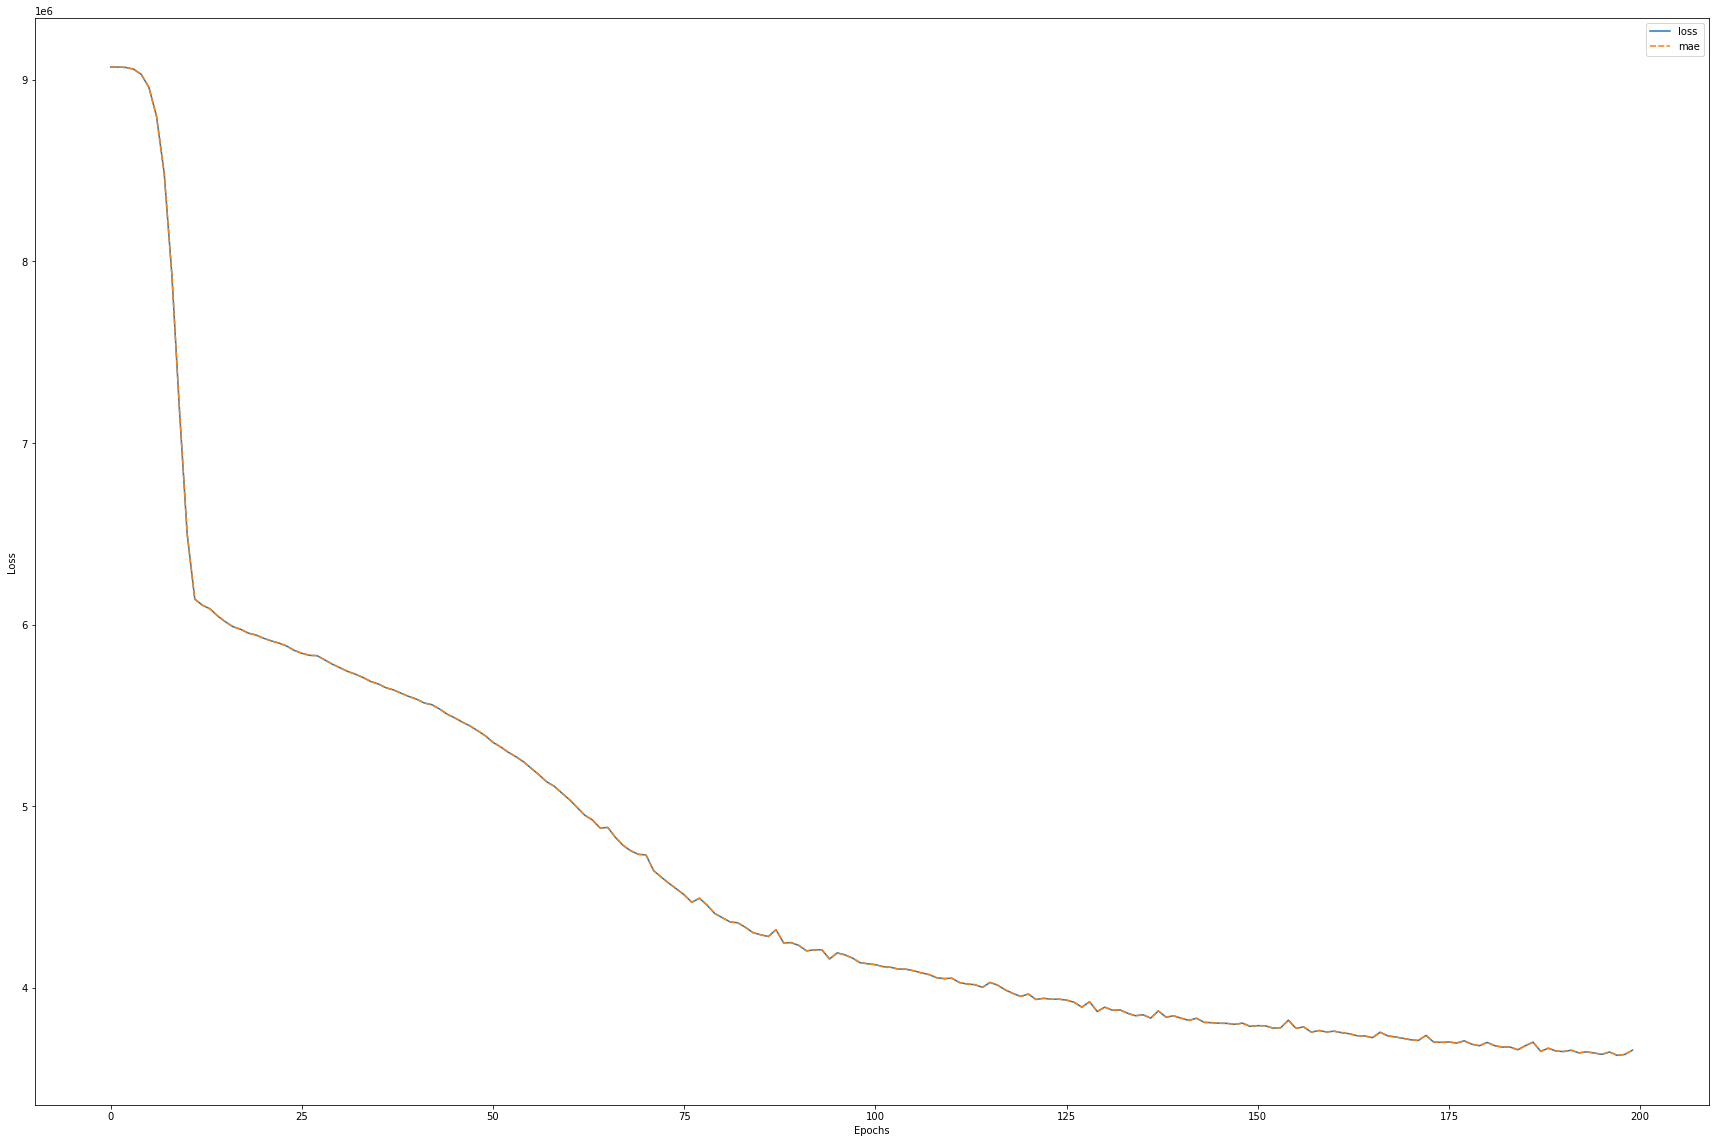

In [103]:
plt.figure(figsize=(30, 20))
plt.xlabel("Epochs")
plt.ylabel("Loss")
sns.lineplot(data=fit_data.history)

In [104]:
# Show the layers the output shape and the number of parameters for each layer
# Trainable Params : Model updates these as it trains
# Non-trainable Params : Not updated during training (Outside Patterns from other Models)
nba_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               2700      
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________
